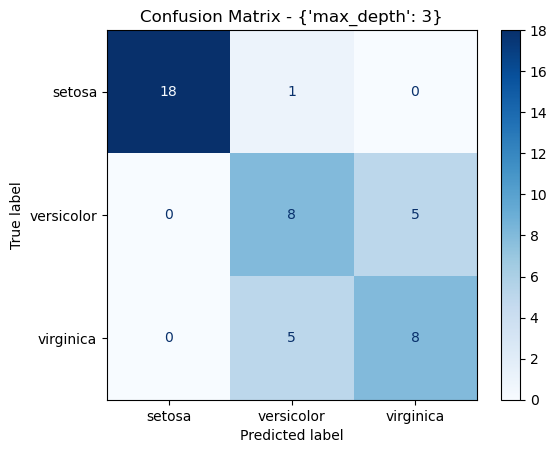

Accuracy ({'max_depth': 3}): 0.76


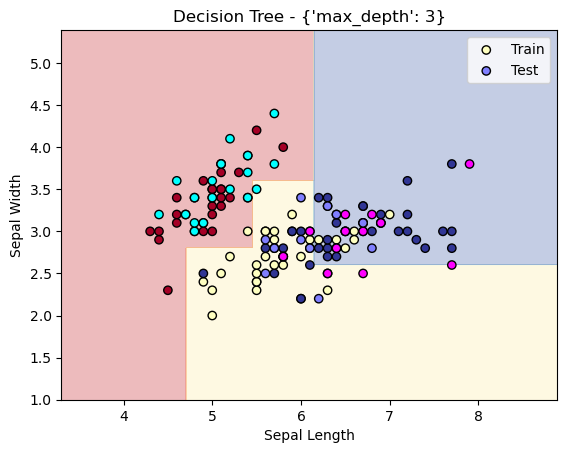

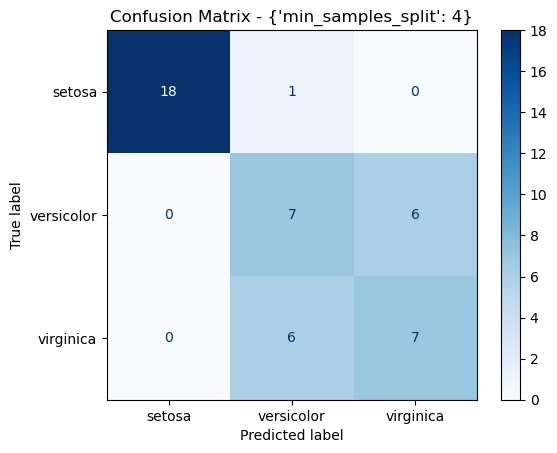

Accuracy ({'min_samples_split': 4}): 0.71


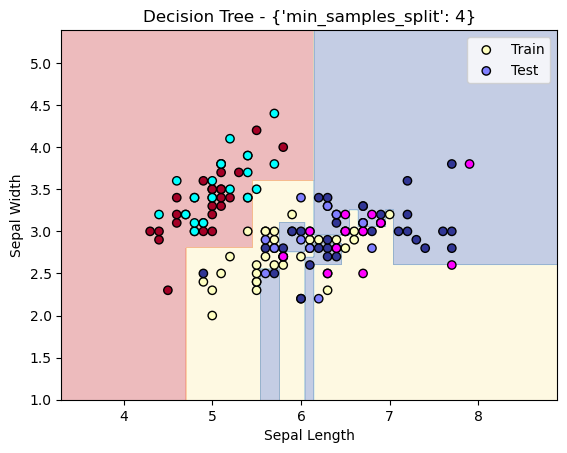

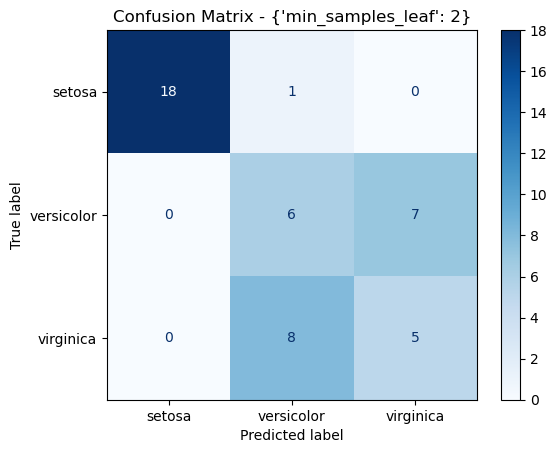

Accuracy ({'min_samples_leaf': 2}): 0.64


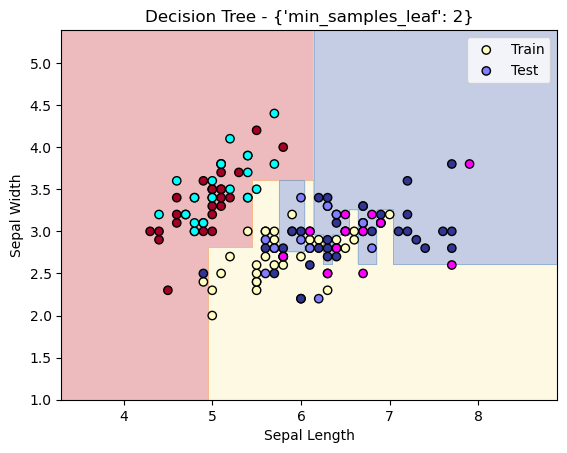

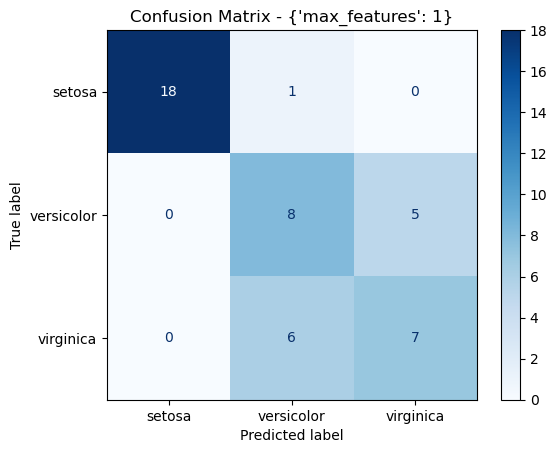

Accuracy ({'max_features': 1}): 0.73


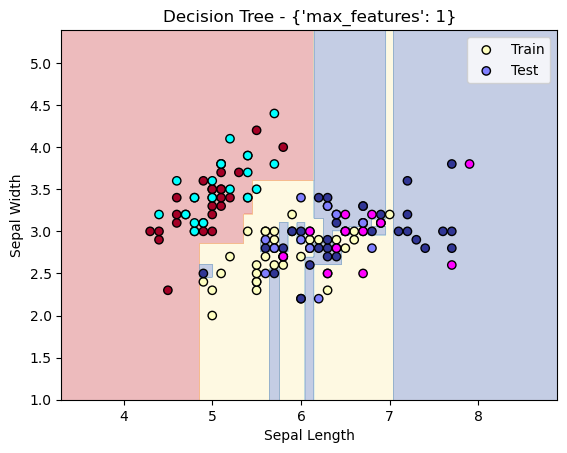

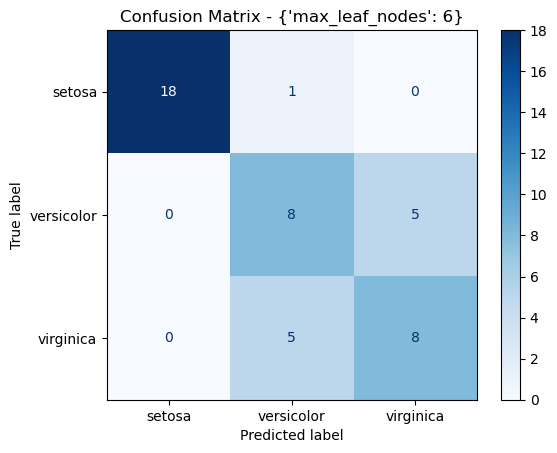

Accuracy ({'max_leaf_nodes': 6}): 0.76


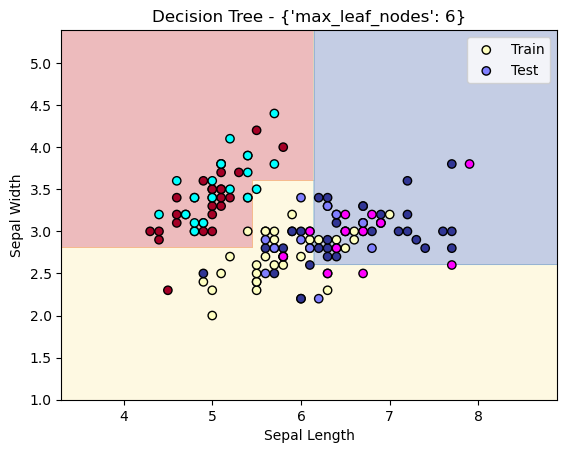

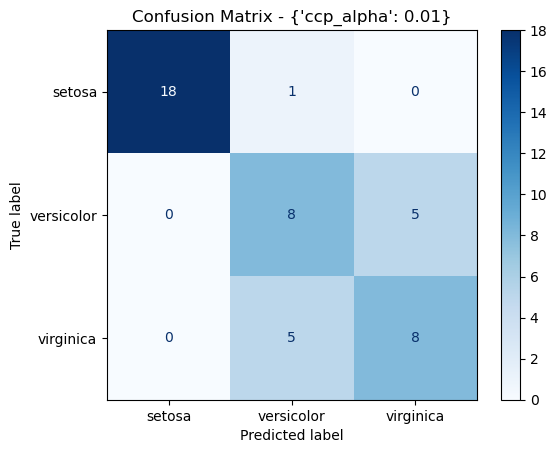

Accuracy ({'ccp_alpha': 0.01}): 0.76


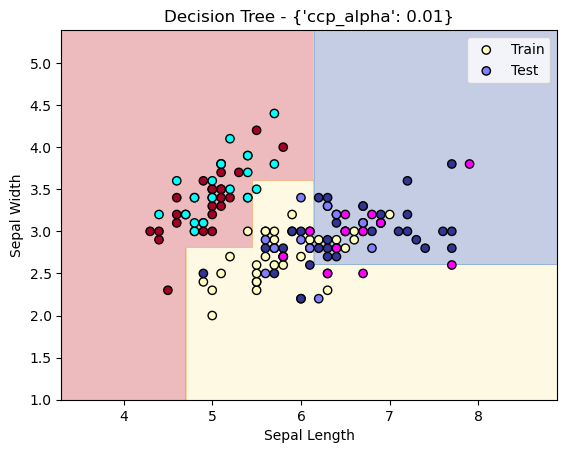

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load dataset and prepare features
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pruning techniques: List of hyperparameters
pruning_params = [
    {'max_depth': 3},
    {'min_samples_split': 4},
    {'min_samples_leaf': 2},
    {'max_features': 1},
    {'max_leaf_nodes': 6},
    {'ccp_alpha': 0.01}
]


def train_and_evaluate(pruning_technique):
    # """Train and evaluate a DecisionTreeClassifier with a given pruning technique."""
    clf = DecisionTreeClassifier(random_state=42, **pruning_technique)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {pruning_technique}")
    plt.show()
    
    print(f"Accuracy ({pruning_technique}): {accuracy:.2f}")
    
    # Plot decision boundary
    plot_decision_boundary(clf, f"Decision Tree - {pruning_technique}")


def plot_decision_boundary(clf, title):
    """Plot decision boundary for the classifier."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdYlBu, label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.cool, label='Test')
    
    plt.title(title)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()
    plt.show()

# Train and evaluate the decision tree using each pruning technique
for params in pruning_params:
    train_and_evaluate(params)
